# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [15]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

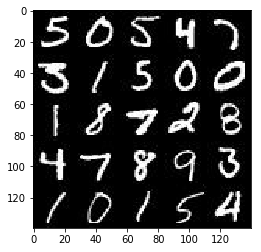

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

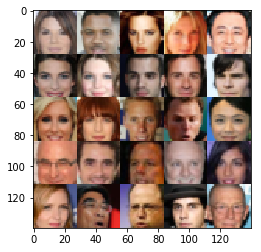

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(shape=(None, image_width, image_height, image_channels),name='real_inputs',dtype=tf.float32)
    z_inputs = tf.placeholder(shape=(None, z_dim),name='z_inputs', dtype=tf.float32)
    learning_rate = tf.placeholder(name='learning_rate', dtype=tf.float32)

    return inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [20]:
def discriminator(images, reuse=False, is_training=True):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        h1 = tf.layers.conv2d(images, 128, 5, 2, 'same')
        h1 = tf.layers.batch_normalization(h1, training=is_training)
        h1 = tf.nn.leaky_relu(h1)
        
        h2 = tf.layers.conv2d(h1, 256, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=is_training)
        h2 = tf.nn.leaky_relu(h2)
        
        h3 = tf.layers.conv2d(h2, 512, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_training)
        h3 = tf.nn.leaky_relu(h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse =not is_train):
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.nn.leaky_relu(h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.nn.leaky_relu(h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.nn.leaky_relu(h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [22]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """

    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [27]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % 10 == 0: #prints every 10 steps
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 100 == 0: #show the generetor output every a hundred steps
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.8405... Generator Loss: 3.9685
Epoch 1/2... Discriminator Loss: 0.2903... Generator Loss: 2.4925
Epoch 1/2... Discriminator Loss: 2.7373... Generator Loss: 0.1868
Epoch 1/2... Discriminator Loss: 1.1721... Generator Loss: 0.5195
Epoch 1/2... Discriminator Loss: 0.8453... Generator Loss: 0.8836
Epoch 1/2... Discriminator Loss: 0.6911... Generator Loss: 1.0220
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 5.5268
Epoch 1/2... Discriminator Loss: 0.7646... Generator Loss: 4.6574
Epoch 1/2... Discriminator Loss: 1.3118... Generator Loss: 1.5286
Epoch 1/2... Discriminator Loss: 0.3592... Generator Loss: 2.0032


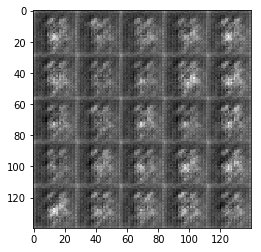

Epoch 1/2... Discriminator Loss: 0.4296... Generator Loss: 1.7465
Epoch 1/2... Discriminator Loss: 1.5385... Generator Loss: 0.3401
Epoch 1/2... Discriminator Loss: 0.9172... Generator Loss: 0.7014
Epoch 1/2... Discriminator Loss: 0.4356... Generator Loss: 2.1237
Epoch 1/2... Discriminator Loss: 0.4399... Generator Loss: 2.1018
Epoch 1/2... Discriminator Loss: 0.7027... Generator Loss: 3.9895
Epoch 1/2... Discriminator Loss: 0.3880... Generator Loss: 2.0428
Epoch 1/2... Discriminator Loss: 0.6584... Generator Loss: 2.1887
Epoch 1/2... Discriminator Loss: 0.9386... Generator Loss: 3.4607
Epoch 1/2... Discriminator Loss: 0.4693... Generator Loss: 1.7391


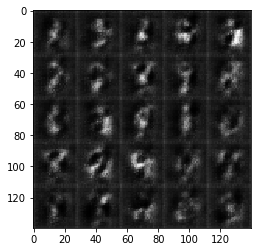

Epoch 1/2... Discriminator Loss: 0.7666... Generator Loss: 2.4616
Epoch 1/2... Discriminator Loss: 0.6118... Generator Loss: 1.5525
Epoch 1/2... Discriminator Loss: 1.1198... Generator Loss: 4.7309
Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 3.4277
Epoch 1/2... Discriminator Loss: 0.8713... Generator Loss: 3.0479
Epoch 1/2... Discriminator Loss: 0.6745... Generator Loss: 2.7275
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 2.8712
Epoch 1/2... Discriminator Loss: 0.6669... Generator Loss: 2.6352
Epoch 1/2... Discriminator Loss: 0.5883... Generator Loss: 2.1976
Epoch 1/2... Discriminator Loss: 1.2909... Generator Loss: 0.4262


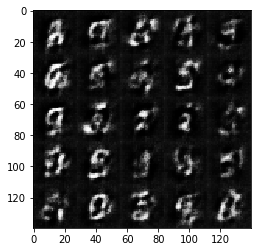

Epoch 1/2... Discriminator Loss: 0.8384... Generator Loss: 0.7501
Epoch 1/2... Discriminator Loss: 0.7403... Generator Loss: 0.8522
Epoch 1/2... Discriminator Loss: 0.4927... Generator Loss: 1.5583
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 4.1340
Epoch 1/2... Discriminator Loss: 0.6888... Generator Loss: 3.0297
Epoch 1/2... Discriminator Loss: 0.7430... Generator Loss: 3.3022
Epoch 1/2... Discriminator Loss: 0.5036... Generator Loss: 2.5522
Epoch 1/2... Discriminator Loss: 0.7015... Generator Loss: 3.0112
Epoch 1/2... Discriminator Loss: 0.8651... Generator Loss: 3.3728
Epoch 1/2... Discriminator Loss: 0.5462... Generator Loss: 1.8515


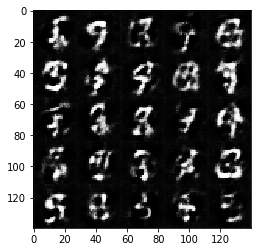

Epoch 1/2... Discriminator Loss: 0.4271... Generator Loss: 1.8888
Epoch 1/2... Discriminator Loss: 0.7564... Generator Loss: 2.8815
Epoch 1/2... Discriminator Loss: 0.4606... Generator Loss: 2.2015
Epoch 1/2... Discriminator Loss: 0.6155... Generator Loss: 2.6794
Epoch 1/2... Discriminator Loss: 0.7657... Generator Loss: 3.2798
Epoch 1/2... Discriminator Loss: 0.4993... Generator Loss: 2.5331
Epoch 2/2... Discriminator Loss: 0.4838... Generator Loss: 2.1402
Epoch 2/2... Discriminator Loss: 2.2168... Generator Loss: 5.5030
Epoch 2/2... Discriminator Loss: 0.4854... Generator Loss: 1.8968
Epoch 2/2... Discriminator Loss: 0.8498... Generator Loss: 0.8497


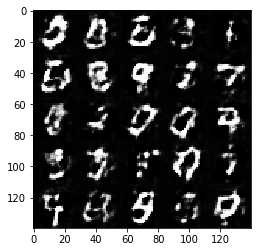

Epoch 2/2... Discriminator Loss: 0.5012... Generator Loss: 1.5007
Epoch 2/2... Discriminator Loss: 0.5625... Generator Loss: 1.2061
Epoch 2/2... Discriminator Loss: 1.4492... Generator Loss: 4.3867
Epoch 2/2... Discriminator Loss: 0.4478... Generator Loss: 2.2889
Epoch 2/2... Discriminator Loss: 0.9963... Generator Loss: 3.8145
Epoch 2/2... Discriminator Loss: 0.4314... Generator Loss: 1.8724
Epoch 2/2... Discriminator Loss: 0.5295... Generator Loss: 2.5764
Epoch 2/2... Discriminator Loss: 0.5095... Generator Loss: 1.9861
Epoch 2/2... Discriminator Loss: 0.6542... Generator Loss: 1.9903
Epoch 2/2... Discriminator Loss: 1.6817... Generator Loss: 0.2627


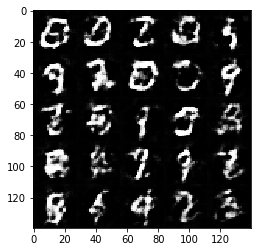

Epoch 2/2... Discriminator Loss: 0.5057... Generator Loss: 1.3915
Epoch 2/2... Discriminator Loss: 0.9377... Generator Loss: 3.5859
Epoch 2/2... Discriminator Loss: 0.5344... Generator Loss: 1.8932
Epoch 2/2... Discriminator Loss: 0.7819... Generator Loss: 2.7754
Epoch 2/2... Discriminator Loss: 0.6151... Generator Loss: 1.6676
Epoch 2/2... Discriminator Loss: 0.6003... Generator Loss: 2.3140
Epoch 2/2... Discriminator Loss: 0.6119... Generator Loss: 2.2585
Epoch 2/2... Discriminator Loss: 0.9173... Generator Loss: 0.7810
Epoch 2/2... Discriminator Loss: 0.4987... Generator Loss: 1.4460
Epoch 2/2... Discriminator Loss: 1.2568... Generator Loss: 3.9203


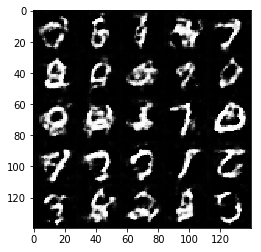

Epoch 2/2... Discriminator Loss: 0.6679... Generator Loss: 2.3954
Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 2.6971
Epoch 2/2... Discriminator Loss: 0.4984... Generator Loss: 2.0645
Epoch 2/2... Discriminator Loss: 0.8501... Generator Loss: 2.6553
Epoch 2/2... Discriminator Loss: 0.8116... Generator Loss: 2.6997
Epoch 2/2... Discriminator Loss: 0.8717... Generator Loss: 1.5983
Epoch 2/2... Discriminator Loss: 1.2994... Generator Loss: 0.4137
Epoch 2/2... Discriminator Loss: 0.5712... Generator Loss: 1.3443
Epoch 2/2... Discriminator Loss: 0.7466... Generator Loss: 2.8807
Epoch 2/2... Discriminator Loss: 0.7718... Generator Loss: 2.3972


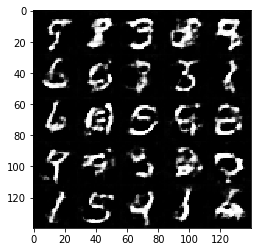

Epoch 2/2... Discriminator Loss: 0.5671... Generator Loss: 1.5738
Epoch 2/2... Discriminator Loss: 0.9007... Generator Loss: 2.8671
Epoch 2/2... Discriminator Loss: 0.5359... Generator Loss: 1.8582
Epoch 2/2... Discriminator Loss: 0.9365... Generator Loss: 2.8804
Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.6907
Epoch 2/2... Discriminator Loss: 1.2533... Generator Loss: 0.4774
Epoch 2/2... Discriminator Loss: 0.7365... Generator Loss: 0.9042
Epoch 2/2... Discriminator Loss: 0.6132... Generator Loss: 1.7402
Epoch 2/2... Discriminator Loss: 0.9804... Generator Loss: 2.5405
Epoch 2/2... Discriminator Loss: 0.5575... Generator Loss: 1.6702


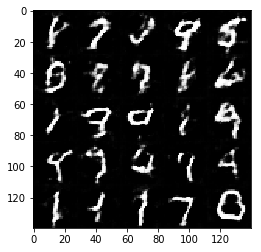

Epoch 2/2... Discriminator Loss: 0.7708... Generator Loss: 1.1972
Epoch 2/2... Discriminator Loss: 0.9341... Generator Loss: 0.7239
Epoch 2/2... Discriminator Loss: 0.4973... Generator Loss: 1.6614


In [28]:
batch_size = 128
z_dim = 128
learning_rate = 0.0001
beta1 = 0.25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4919... Generator Loss: 2.1380
Epoch 1/1... Discriminator Loss: 0.3067... Generator Loss: 2.8959
Epoch 1/1... Discriminator Loss: 0.4528... Generator Loss: 1.2083
Epoch 1/1... Discriminator Loss: 1.9999... Generator Loss: 9.0789
Epoch 1/1... Discriminator Loss: 2.2227... Generator Loss: 2.0569
Epoch 1/1... Discriminator Loss: 0.2333... Generator Loss: 3.1641
Epoch 1/1... Discriminator Loss: 0.3913... Generator Loss: 2.1073
Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 3.2078
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 11.6763
Epoch 1/1... Discriminator Loss: 0.4389... Generator Loss: 2.9508


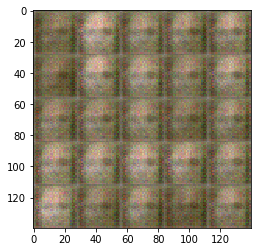

Epoch 1/1... Discriminator Loss: 0.4900... Generator Loss: 1.5098
Epoch 1/1... Discriminator Loss: 0.4782... Generator Loss: 2.3232
Epoch 1/1... Discriminator Loss: 0.5385... Generator Loss: 1.3711
Epoch 1/1... Discriminator Loss: 0.3748... Generator Loss: 1.8605
Epoch 1/1... Discriminator Loss: 0.3031... Generator Loss: 2.1714
Epoch 1/1... Discriminator Loss: 0.5040... Generator Loss: 2.1236
Epoch 1/1... Discriminator Loss: 0.5183... Generator Loss: 1.5139
Epoch 1/1... Discriminator Loss: 0.7322... Generator Loss: 3.6526
Epoch 1/1... Discriminator Loss: 0.8048... Generator Loss: 2.6028
Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 3.3501


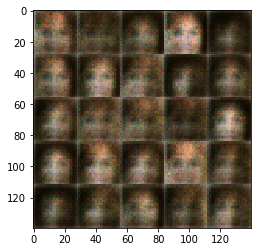

Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 0.5981
Epoch 1/1... Discriminator Loss: 0.6566... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 1.4481
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 1.3694
Epoch 1/1... Discriminator Loss: 0.3573... Generator Loss: 2.1341
Epoch 1/1... Discriminator Loss: 0.3637... Generator Loss: 2.4494
Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 0.7680
Epoch 1/1... Discriminator Loss: 0.8180... Generator Loss: 0.7863
Epoch 1/1... Discriminator Loss: 0.6375... Generator Loss: 1.0963
Epoch 1/1... Discriminator Loss: 0.6292... Generator Loss: 1.2117


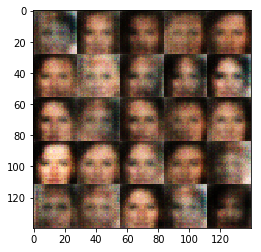

Epoch 1/1... Discriminator Loss: 0.6120... Generator Loss: 2.7835
Epoch 1/1... Discriminator Loss: 0.4877... Generator Loss: 3.8105
Epoch 1/1... Discriminator Loss: 0.4769... Generator Loss: 1.4620
Epoch 1/1... Discriminator Loss: 0.4146... Generator Loss: 2.8142
Epoch 1/1... Discriminator Loss: 0.5943... Generator Loss: 3.3917
Epoch 1/1... Discriminator Loss: 0.8806... Generator Loss: 2.9497
Epoch 1/1... Discriminator Loss: 0.4483... Generator Loss: 2.3484
Epoch 1/1... Discriminator Loss: 0.6572... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 0.5057... Generator Loss: 1.4457
Epoch 1/1... Discriminator Loss: 0.8172... Generator Loss: 2.5483


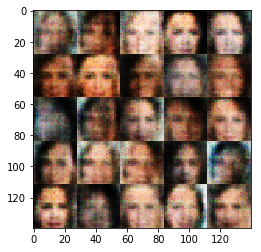

Epoch 1/1... Discriminator Loss: 0.6174... Generator Loss: 2.1856
Epoch 1/1... Discriminator Loss: 0.4638... Generator Loss: 1.6392
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 2.0131
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.5259
Epoch 1/1... Discriminator Loss: 0.5944... Generator Loss: 1.2432
Epoch 1/1... Discriminator Loss: 0.3743... Generator Loss: 1.9523
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.3653
Epoch 1/1... Discriminator Loss: 1.5146... Generator Loss: 0.3411
Epoch 1/1... Discriminator Loss: 0.6396... Generator Loss: 1.1067
Epoch 1/1... Discriminator Loss: 0.8921... Generator Loss: 0.7805


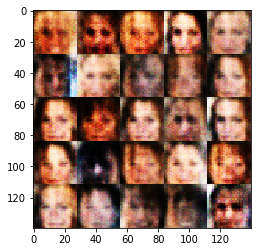

Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 0.8693... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 0.5263... Generator Loss: 1.7028
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 1.4785
Epoch 1/1... Discriminator Loss: 0.5363... Generator Loss: 2.6263
Epoch 1/1... Discriminator Loss: 0.8591... Generator Loss: 2.4125
Epoch 1/1... Discriminator Loss: 1.0988... Generator Loss: 3.7210
Epoch 1/1... Discriminator Loss: 0.5039... Generator Loss: 2.4773
Epoch 1/1... Discriminator Loss: 0.8735... Generator Loss: 2.0967


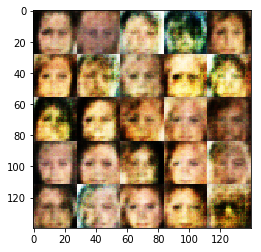

Epoch 1/1... Discriminator Loss: 0.6291... Generator Loss: 1.6945
Epoch 1/1... Discriminator Loss: 1.6930... Generator Loss: 4.3508
Epoch 1/1... Discriminator Loss: 0.6290... Generator Loss: 1.8098
Epoch 1/1... Discriminator Loss: 1.1944... Generator Loss: 2.8590
Epoch 1/1... Discriminator Loss: 0.6704... Generator Loss: 2.1938
Epoch 1/1... Discriminator Loss: 0.5996... Generator Loss: 2.2812
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 3.5435
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 2.1287
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 3.0319
Epoch 1/1... Discriminator Loss: 0.7974... Generator Loss: 1.6414


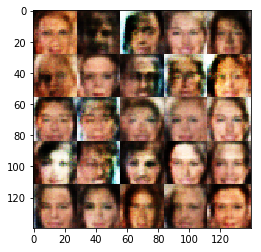

Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 3.7447
Epoch 1/1... Discriminator Loss: 0.7909... Generator Loss: 1.1422
Epoch 1/1... Discriminator Loss: 0.7376... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 1.0082... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.0590... Generator Loss: 0.6071
Epoch 1/1... Discriminator Loss: 1.0352... Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 0.5502... Generator Loss: 1.6235
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 0.5496
Epoch 1/1... Discriminator Loss: 0.4966... Generator Loss: 1.8195
Epoch 1/1... Discriminator Loss: 1.8064... Generator Loss: 3.0111


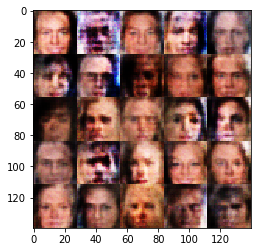

Epoch 1/1... Discriminator Loss: 0.7489... Generator Loss: 1.5096
Epoch 1/1... Discriminator Loss: 0.5349... Generator Loss: 2.1161
Epoch 1/1... Discriminator Loss: 0.7103... Generator Loss: 3.1153
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 2.4109
Epoch 1/1... Discriminator Loss: 0.6794... Generator Loss: 1.1710
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.5368
Epoch 1/1... Discriminator Loss: 0.9150... Generator Loss: 3.4251
Epoch 1/1... Discriminator Loss: 0.5102... Generator Loss: 2.5545
Epoch 1/1... Discriminator Loss: 0.6186... Generator Loss: 3.1238


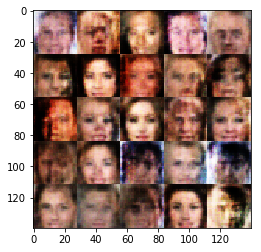

Epoch 1/1... Discriminator Loss: 1.1263... Generator Loss: 2.7669
Epoch 1/1... Discriminator Loss: 0.5408... Generator Loss: 2.1206
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 2.6969
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 2.8707
Epoch 1/1... Discriminator Loss: 0.5396... Generator Loss: 1.7151
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 3.1940
Epoch 1/1... Discriminator Loss: 0.6693... Generator Loss: 3.0586
Epoch 1/1... Discriminator Loss: 1.0940... Generator Loss: 2.3725
Epoch 1/1... Discriminator Loss: 0.5267... Generator Loss: 2.8349
Epoch 1/1... Discriminator Loss: 1.0544... Generator Loss: 2.8903


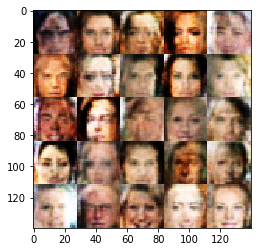

Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 3.6547
Epoch 1/1... Discriminator Loss: 0.7930... Generator Loss: 1.2207
Epoch 1/1... Discriminator Loss: 0.5692... Generator Loss: 1.5387
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 1.4913
Epoch 1/1... Discriminator Loss: 1.8136... Generator Loss: 0.2619
Epoch 1/1... Discriminator Loss: 0.7365... Generator Loss: 1.2153
Epoch 1/1... Discriminator Loss: 0.4509... Generator Loss: 2.0532
Epoch 1/1... Discriminator Loss: 0.4700... Generator Loss: 2.6976
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 3.0323
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 1.9101


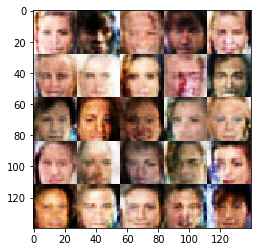

Epoch 1/1... Discriminator Loss: 1.9342... Generator Loss: 0.1992
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 1.1851
Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 0.9822
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.0715... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.0518... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 0.6725... Generator Loss: 1.0084
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 1.6306
Epoch 1/1... Discriminator Loss: 0.3858... Generator Loss: 1.6024
Epoch 1/1... Discriminator Loss: 1.6331... Generator Loss: 3.5870


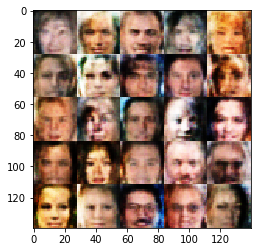

Epoch 1/1... Discriminator Loss: 0.6358... Generator Loss: 1.5032
Epoch 1/1... Discriminator Loss: 0.4571... Generator Loss: 2.5696
Epoch 1/1... Discriminator Loss: 1.5695... Generator Loss: 4.2503
Epoch 1/1... Discriminator Loss: 0.7985... Generator Loss: 1.6547
Epoch 1/1... Discriminator Loss: 0.4832... Generator Loss: 3.4380
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 2.4298
Epoch 1/1... Discriminator Loss: 0.2988... Generator Loss: 2.7538
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 3.3742
Epoch 1/1... Discriminator Loss: 0.8512... Generator Loss: 1.3353
Epoch 1/1... Discriminator Loss: 0.8246... Generator Loss: 1.6625


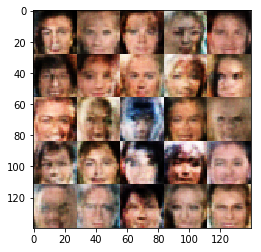

Epoch 1/1... Discriminator Loss: 0.6810... Generator Loss: 1.5767
Epoch 1/1... Discriminator Loss: 0.7011... Generator Loss: 0.9470
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 0.8969... Generator Loss: 0.7335
Epoch 1/1... Discriminator Loss: 0.4159... Generator Loss: 3.0959
Epoch 1/1... Discriminator Loss: 0.9154... Generator Loss: 2.9329
Epoch 1/1... Discriminator Loss: 0.6726... Generator Loss: 1.3145
Epoch 1/1... Discriminator Loss: 0.7628... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 0.5836... Generator Loss: 3.3912
Epoch 1/1... Discriminator Loss: 0.7865... Generator Loss: 2.9757


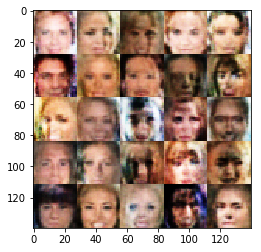

Epoch 1/1... Discriminator Loss: 0.3547... Generator Loss: 3.3103
Epoch 1/1... Discriminator Loss: 0.8293... Generator Loss: 4.1079
Epoch 1/1... Discriminator Loss: 0.7928... Generator Loss: 1.6192
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 1.4114
Epoch 1/1... Discriminator Loss: 0.3761... Generator Loss: 2.3041
Epoch 1/1... Discriminator Loss: 0.4702... Generator Loss: 3.3642
Epoch 1/1... Discriminator Loss: 0.5684... Generator Loss: 4.1461
Epoch 1/1... Discriminator Loss: 0.4158... Generator Loss: 2.9258
Epoch 1/1... Discriminator Loss: 0.4906... Generator Loss: 2.9575
Epoch 1/1... Discriminator Loss: 0.5284... Generator Loss: 3.4685


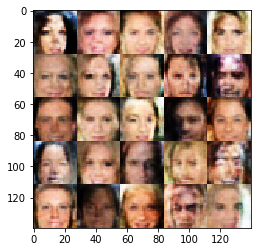

Epoch 1/1... Discriminator Loss: 0.3460... Generator Loss: 3.1932
Epoch 1/1... Discriminator Loss: 0.6752... Generator Loss: 4.6020
Epoch 1/1... Discriminator Loss: 0.6038... Generator Loss: 2.0152
Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 0.8467... Generator Loss: 0.7116
Epoch 1/1... Discriminator Loss: 0.6640... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 0.5084... Generator Loss: 3.9892
Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 2.8300


In [29]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.